## Machine Learning: Practical Machine Learning

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

<!-- <sup>Some parts were from the notebooks I created for the Data Science Short Course program under Data Science Institute - De La Salle University</sup> <br> -->

## Preliminaries

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')
# sns.color_palette('tab10')
sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Regularization

Regularization sometimes helps in avoiding overfitting by making the weights small--our model won't give too much preference on a certain weight. This technique apply to models that have weights such as linear/logistic regression, SVM, and neural networks.

Lasso and Ridge are variations of the vanilla linear regression with regularization. Lasso uses L1-penalty while Ridge uses L2-penalty.

Here's an example.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge

X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Linear Regression')
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = model.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

print('---')
print('Lasso Regression')
model = Lasso(alpha=100)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = model.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

print('---')
print('Ridge Regression')
model = Ridge(alpha=100)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = model.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

Linear Regression
Train Set Score: 75.09%
Test Set Score: 66.88%
---
Lasso Regression
Train Set Score: 22.07%
Test Set Score: 24.56%
---
Ridge Regression
Train Set Score: 72.30%
Test Set Score: 68.00%


We can configure the alpha values to change the regularization effect. Higher alpha means higher regularization. In the example above, we arbitrarily used `alpha=100`, and Ridge Regression (with that hyperparameter) performed best on our test set.

In Logistic Regression's case, the regularization is already a part of the parameters that we could set in sklearn's implementation.

In [ ]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Logistic Regression')
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = model.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

print('---')
print('Logistic Regression')
model = LogisticRegression(penalty='l2', C=0.01)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = model.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

print('---')
print('Logistic Regression')
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = model.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

Logistic Regression
Train Set Score: 98.33%
Test Set Score: 100.00%
---
Logistic Regression
Train Set Score: 87.50%
Test Set Score: 93.33%
---
Logistic Regression
Train Set Score: 32.50%
Test Set Score: 36.67%


In Logistic Regression, lower C means higher regularization. In the example above, regularization worsened the results. The vanilla logistic regression is already good enough.

## Hyperparameter Optimization

### Train-val-test split
One way of doing evaluation is through train-val-test split. We have split the train and test earlier. Now, we will be splitting the train set further into train and val sets.

In [ ]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Val Set Size | Input: {X_val.shape}, Output: {y_val.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (303, 13), Output: (303,)
Val Set Size | Input: (101, 13), Output: (101,)
Test Set Size | Input: (102, 13), Output: (102,)


We will be selecting the model with the best hyperparameter.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

n_params = list(range(1,6))
scores = []

for n_neighbors in n_params:
  reg = KNeighborsRegressor(n_neighbors=n_neighbors, p=2, n_jobs=-1) # instantiate model
  reg.fit(X_train, y_train) # train the model
  train_score = reg.score(X_train, y_train)
  val_score = reg.score(X_val, y_val)
  scores.append([n_neighbors, train_score, val_score])

df_scores = pd.DataFrame(scores, columns=['n', 'train_score', 'val_score'])
df_scores['n'] = df_scores['n'].astype(int)
df_scores.sort_values(by='val_score', ascending=False)

,n,train_score,val_score
1,2,0.834485,0.476486
0,1,1.000000,0.344352
3,4,0.726004,0.337002
2,3,0.745978,0.331292
4,5,0.690706,0.319002


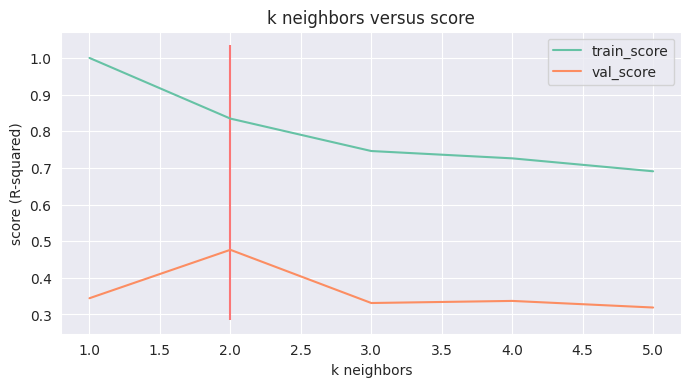

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=100)
df_scores.plot(x='n', ax=ax)

ymin, ymax = ax.get_ylim()
ax.vlines(x=2, ymin=ymin, ymax=ymax, colors='#fb7676')
plt.title('k neighbors versus score')
plt.xlabel('k neighbors')
plt.ylabel('score (R-squared)')
plt.show()

In [ ]:
reg = KNeighborsRegressor(n_neighbors=2, p=2, n_jobs=-1) # instantiate model
reg.fit(X_train, y_train) # train the model
score = reg.score(X_test, y_test) # does prediction and score evaluation in 1 line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 64.44%


### k-fold Cross Validation

This is a more robust way of doing evaluating a model. We do k-folds of the initial train set and use 1 fold as the validation set and the rest as train set. Then we do this for all folds, which will gives us k models and their scores. We then average out the scores, and that's our score for a specific model configuration. After that, we do the same for all model configurations and we choose the best one.

#### kNN Regressor

Let's identify the kNN model with the best hyperparameters for this dataset. 

In [ ]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1,6)}
model = KNeighborsRegressor(p=2, n_jobs=-1)
reg = GridSearchCV(model, parameters, cv=10) # 10 is the rule of thumb
reg.fit(X_train, y_train)
print('Best score: {}'.format(reg.best_score_))
print('Best parameters: {}'.format(reg.best_params_))

Best score: 0.48606300885866477
Best parameters: {'n_neighbors': 4}


In [ ]:
score = reg.best_estimator_.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")
model = reg.best_estimator_
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Train Set Score: 71.52%
Test Set Score: 67.18%


Now, let's do hyperparameter optimization for Lasso and Ridge Regression.

#### Lasso

In [ ]:
parameters = {'alpha': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}
model = Lasso()
reg = GridSearchCV(model, parameters, cv=10) # 10 is the rule of thumb
reg.fit(X_train, y_train)
print('Best score: {}'.format(reg.best_score_))
print('Best parameters: {}'.format(reg.best_params_))

Best score: 0.6986395569617031
Best parameters: {'alpha': 0.001}


In [ ]:
score = reg.best_estimator_.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")
model = reg.best_estimator_
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Train Set Score: 75.09%
Test Set Score: 66.88%


#### Ridge

In [ ]:
parameters = {'alpha': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}
model = Ridge()
reg = GridSearchCV(model, parameters, cv=10) # 10 is the rule of thumb
reg.fit(X_train, y_train)
print('Best score: {}'.format(reg.best_score_))
print('Best parameters: {}'.format(reg.best_params_))

Best score: 0.698663010001684
Best parameters: {'alpha': 0.001}


In [ ]:
score = reg.best_estimator_.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")
model = reg.best_estimator_
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Train Set Score: 75.09%
Test Set Score: 66.88%


Seems like they both converged to the same result.

#### Logistic Regression

Let's do another example but for logistic regression.

In [ ]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)


In [ ]:
parameters = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3], 
              'penalty': ['l1', 'l2']}
model = LogisticRegression(solver='liblinear')
clf = GridSearchCV(model, parameters, cv=10) # 10 is the rule of thumb
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Best score: 0.95
Best parameters: {'C': 1, 'penalty': 'l1'}


In [ ]:
score = clf.best_estimator_.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")
model = clf.best_estimator_
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Train Set Score: 95.83%
Test Set Score: 100.00%


## Model Evaluation Metrics

### Binary Classification 

Classification metrics for binary problem depend on which is your positive/negative class.

$$Precision = \frac{True Positive}{True Positive + False Positive}$$  
$$Recall =\frac{True Positive}{True Positive + False Negative}$$  
$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$  

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [1,1,1,1,1,1,1,0,0,0] # ideal / true values
y_pred = [1,1,1,1,1,1,0,1,1,0] # predicted values

# y_true = [0,0,0,0,0,0,0,0,1,1]
# y_pred = [0,0,0,0,0,0,0,0,0,0]

# 1 - positive label
score = accuracy_score(y_true, y_pred)
print(f"Accuracy: {score:.2%}")
score = precision_score(y_true, y_pred)
print(f"Precision: {score:.2%}")
score = recall_score(y_true, y_pred)
print(f"Recall: {score:.2%}")
score = f1_score(y_true, y_pred)
print(f"F1: {score:.2%}")

print('\n---Switch labels/classes---\n')
y_true = [-(i-1) for i in y_true] # switch classes
y_pred = [-(i-1) for i in y_pred] # switch classes

# 1 - positive label
score = accuracy_score(y_true, y_pred)
print(f"Accuracy: {score:.2%}")
score = precision_score(y_true, y_pred)
print(f"Precision: {score:.2%}")
score = recall_score(y_true, y_pred)
print(f"Recall: {score:.2%}")
score = f1_score(y_true, y_pred)
print(f"F1: {score:.2%}")

Accuracy: 70.00%
Precision: 75.00%
Recall: 85.71%
F1: 80.00%

---Switch labels/classes---

Accuracy: 70.00%
Precision: 50.00%
Recall: 33.33%
F1: 40.00%


### Multi-class Classification

In [ ]:
y_true = [1,1,1,1,2,2,2,0,0,0]
y_pred = [1,2,0,1,1,1,0,1,1,0]

score = accuracy_score(y_true, y_pred)
print(f"Accuracy: {score:.2%}")

print('\n---Macro---\n')
score = precision_score(y_true, y_pred, average='macro')
print(f"Precision: {score:.2%}")
score = recall_score(y_true, y_pred, average='macro')
print(f"Recall: {score:.2%}")
score = f1_score(y_true, y_pred, average='macro')
print(f"F1: {score:.2%}")

print('\n---Micro---\n')
score = precision_score(y_true, y_pred, average='micro')
print(f"Precision: {score:.2%}")
score = recall_score(y_true, y_pred, average='micro')
print(f"Recall: {score:.2%}")
score = f1_score(y_true, y_pred, average='micro')
print(f"F1: {score:.2%}")

print('\n---Weighted---\n')
score = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {score:.2%}")
score = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {score:.2%}")
score = f1_score(y_true, y_pred, average='weighted')
print(f"F1: {score:.2%}")

Accuracy: 30.00%

---Macro---

Precision: 22.22%
Recall: 27.78%
F1: 24.44%

---Micro---

Precision: 30.00%
Recall: 30.00%
F1: 30.00%

---Weighted---

Precision: 23.33%
Recall: 30.00%
F1: 26.00%


**What happened?**

`'micro'`:  
Calculate metrics globally by counting the total true positives, false negatives and false positives.

`'macro'`:  
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

`'weighted'`:  
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

---

Micro-averages without setting the labels parameter--interprets which labels are pos/neg--are just the accuracies.

Macro-averages are used when you want to have a bias towards the least populated class.

Let's do the same for real-world dataset.

In [ ]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(C=0.01)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.875

In [ ]:
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {score:.2%}")

score = precision_score(y_test, y_pred, average='macro')
print(f"Test Set Precision: {score:.2%}")

score = recall_score(y_test, y_pred, average='macro')
print(f"Test Set Recall: {score:.2%}")

score = f1_score(y_test, y_pred, average='macro')
print(f"Test Set F1: {score:.2%}")

Test Set Accuracy: 93.33%
Test Set Precision: 94.87%
Test Set Recall: 92.59%
Test Set F1: 93.06%


## Exploratory Data Analysis (EDA)

EDA is a very important part that you should not skip when doing any analysis. Visualizing data is a very big topic on its own so I'll just show a very basic EDA process. For a more comprehensive exploratory data analysis example, see the following <a href="https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb">link</a>.

Let's use the **Boston dataset** for the following examples. It contains the house pricing data in Boston as well as the following features:

 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per \$10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000’s

For more info, please see <a href="https://scikit-learn.org/stable/datasets/index.html#boston-dataset">this link</a>.


### Snapshot of data (DataFrame/Table)

We want to have an idea of the values that we have in our data.

In [ ]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
columns = datasets.load_boston()['feature_names'].tolist() + ['target']
df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=columns)
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18


### High-level statistics

In [ ]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.376238
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.381203
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.750000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.000000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Single-feature Scatterplot

It would be too exhaustive if we check all features so, for now, we'll just be visualizing how crime rate affects house prices.

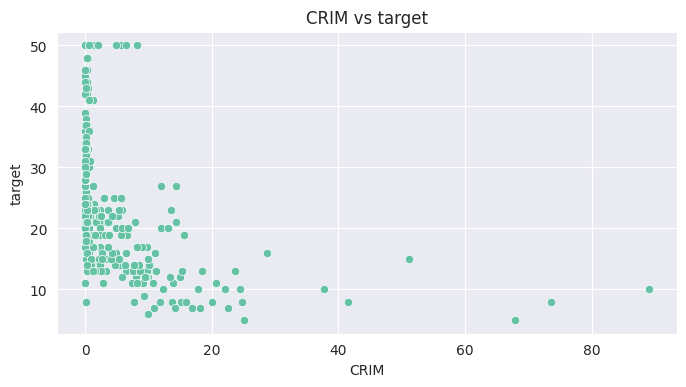

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(data=df_train, x='CRIM', y='target', palette="Set2")
plt.title('CRIM vs target')
plt.show()

### Correlation Heatmap
What if we check the feature with the highest correlation with the price?

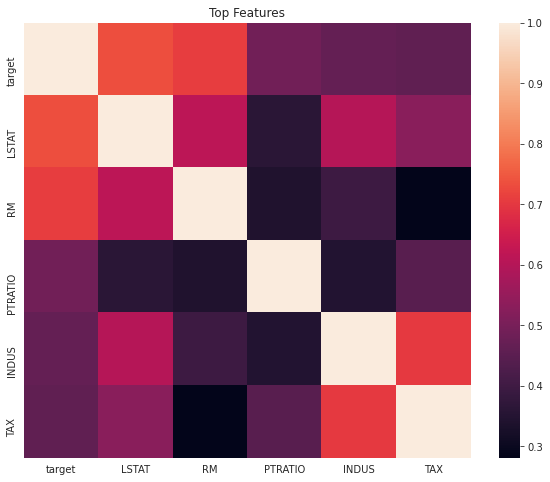

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
corrMatrix = df_train.corr(method='pearson').abs()
corrMatrix = corrMatrix.sort_values(by='target', ascending=False)
features = corrMatrix.index[:6].tolist()
corrMatrix = corrMatrix.loc[features, features]
sns.heatmap(corrMatrix, annot=False)
plt.title('Top Features')
plt.show()

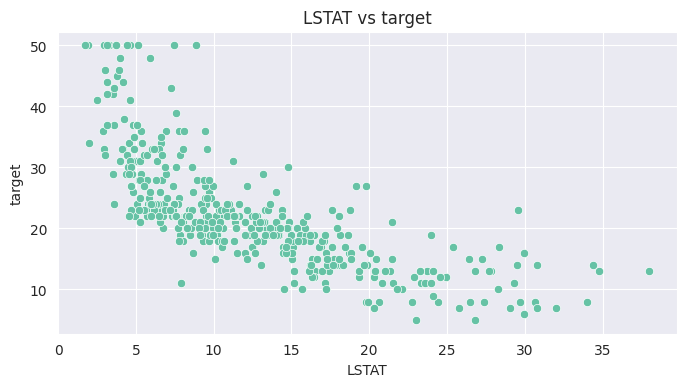

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(data=df_train, x='LSTAT', y='target')
plt.title('LSTAT vs target')
plt.show()

## Feature Engineering

Similar to EDA, this is a very big topic to cover but the main idea is we want to do some manipulations on our original dataset that can help us in the modeling stage later on.

### Encoding

One of the most common techniques is encoding. In Machine Learning, we need our values to be numbers, not strings/characters, so what should we do with our text data? We convert them into numbers. For categorical data, we simply create one column per category and set to 1 or 0 if the category is present in a particular row.

Let's create a toy dataset.

In [ ]:
df = pd.DataFrame({'name': ['Jude', 'Venti', 'Klee'],
                   'element': [None, 'Anemo', 'Pyro'],
                   'damage': [100, 800, 1800]})
df

,name,element,damage
0,Jude,None,100
1,Venti,Anemo,800
2,Klee,Pyro,1800


I know that this is a very small dataset, but let's say we want to predict the `damage` given the `element`? This makes our `damage` the target variable and `element` as input feature. Name is really unimportant in this problem so we just omit that. 

In [ ]:
df_processed = df.drop('name', axis=1)
df_processed

,element,damage
0,None,100
1,Anemo,800
2,Pyro,1800


Since `element` is categorical, we have to turn it into numbers. Pandas has a function which lets us do that.

In [ ]:
pd.get_dummies(df_processed, columns=['element'])

,damage,element_Anemo,element_Pyro
0,100,0,0
1,800,1,0
2,1800,0,1


Now our data is in a format that is ready for Machine Learning.

### Mathematical Operations

Sometimes we want to transform our numerical values through some mathematical operation.

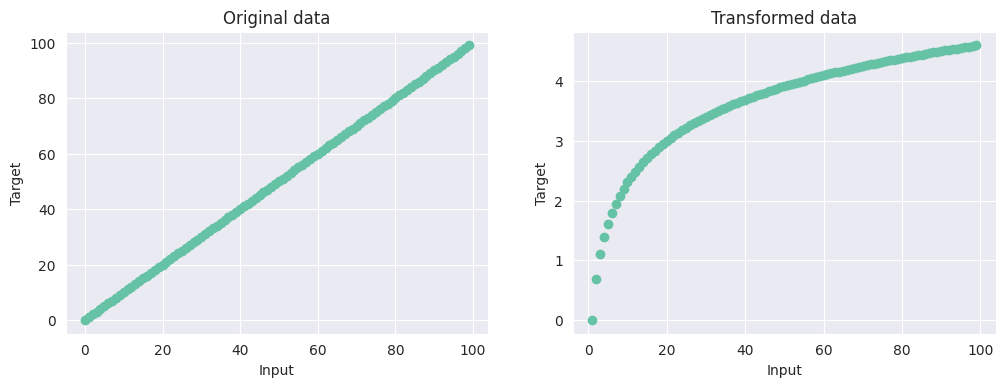

In [ ]:
x = np.arange(100)
y = x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), dpi=100)

ax1.scatter(x, y)
ax1.set_title('Original data')
ax1.set_xlabel('Input')
ax1.set_ylabel('Target')

y = np.log(y)
ax2.scatter(x, y)
ax2.set_title('Transformed data')
ax2.set_xlabel('Input')
ax2.set_ylabel('Target')

plt.show()

Let's do the same for Boston dataset.

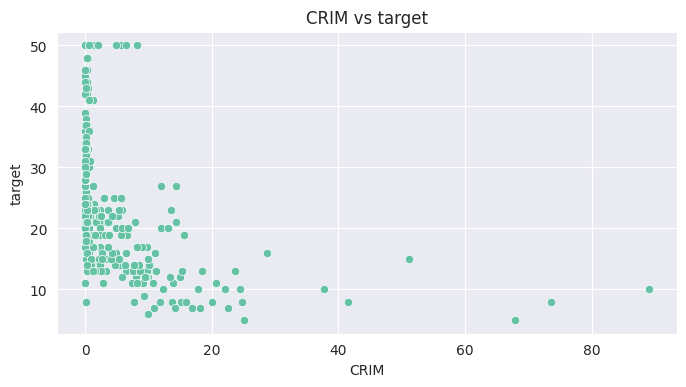

In [ ]:
df_train_copy = df_train.copy()

plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(data=df_train_copy, x='CRIM', y='target', palette="Set2")
plt.title('CRIM vs target')
plt.show()

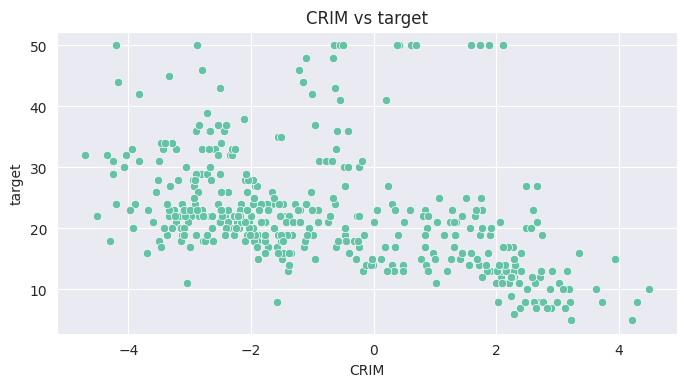

In [ ]:
df_train_copy['CRIM'] = df_train_copy['CRIM'].apply(np.log)

plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(data=df_train_copy, x='CRIM', y='target', palette="Set2")
plt.title('CRIM vs target')
plt.show()

## Applications

### Image Classification

Let's try classifying an image data.

In [ ]:
data_bunch = datasets.load_digits(n_class=10, return_X_y=False)
X, y = data_bunch['data'], data_bunch['target']

#### Visualize

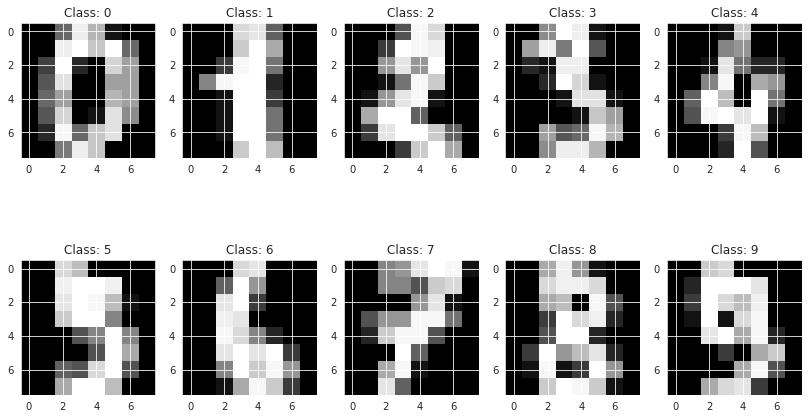

In [ ]:
import matplotlib.cm as cm

fig, ax = plt.subplots(2,5, figsize=(14,8))

for ind in range(10):
    rows = ind // 5
    cols = ind % 5
    ax[rows][cols].imshow((X[ind]).reshape(8,8), cmap=cm.Greys_r)
    ax[rows][cols].set_title(f'Class: {y[ind]}')

#### Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

#### Modeling

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=-1) # instantiate model
clf.fit(X_train, y_train) # train the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

#### Evaluation

Note that this is an easy dataset. Hence, we're getting **almost perfect results despite the simplicity of the model. In real-world applications, this won't work.**

In [ ]:
score = clf.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")
score = clf.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Train Set Score: 100.00%
Test Set Score: 97.78%


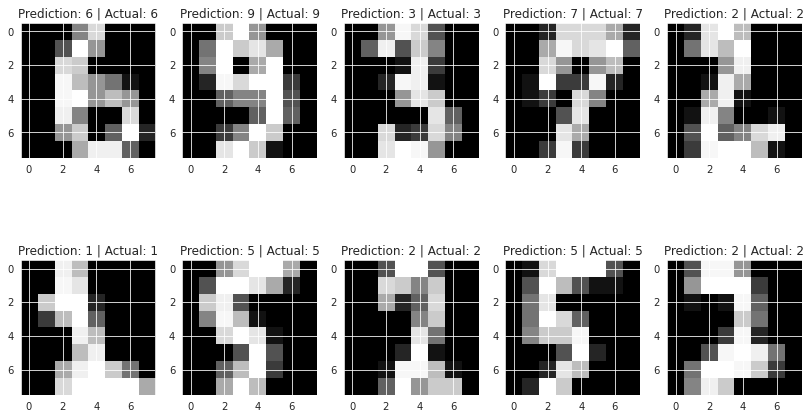

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(14,8))
for ind in range(10):
    rows = ind // 5
    cols = ind % 5
    pred = clf.predict([X_test[ind]])[0]
    actual = y_test[ind]
    ax[rows][cols].imshow((X_test[ind]).reshape(8,8), cmap=cm.Greys_r)
    ax[rows][cols].set_title(f'Prediction: {pred} | Actual: {actual}')

### Spam Classifier

Let's try to identify which emails are spam based on the content.

In [4]:
df_spam = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/spam_ham_dataset.csv')
df_spam = df_spam[['label', 'text']]
df_spam.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...


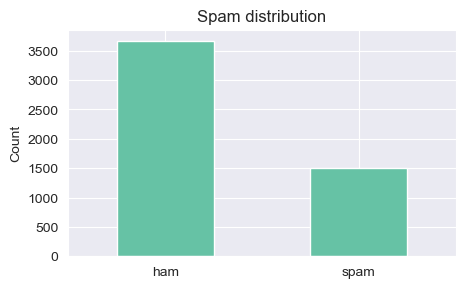

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=100)
df_spam['label'].value_counts().plot(kind='bar')
plt.title('Spam distribution')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

#### Preprocessing

We will preprocess our text data first so that it can be understood by our ML model.

In [6]:
X = df_spam['text']
y = df_spam['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (5171,), Output: (5171,)
Train Set Size | Input: (4136,), Output: (4136,)
Test Set Size | Input: (1035,), Output: (1035,)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = X_train
vec = CountVectorizer(stop_words='english', min_df=10)
X_train_transformed = vec.fit_transform(X_train).todense()
X_test_transformed = vec.transform(X_test).todense()

In [8]:
X_train_transformed.shape, X_test_transformed.shape

((4136, 3955), (1035, 3955))

#### Modeling

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_transformed, y_train)
score = clf.score(X_train_transformed, y_train) # predicts and evaluates in one line
print(f"Train Set Score: {score:.2%}")

Train Set Score: 99.76%


In [10]:
score = clf.score(X_test_transformed, y_test) # predicts and evaluates in one line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 97.68%


#### Not Spam (Ham) Examples

In [11]:
hams = y_test[y_test=='ham'].iloc[:5]
hams

1566    ham
1235    ham
2868    ham
4903    ham
1471    ham
Name: label, dtype: object

In [12]:
sample = X_test[hams.index]
sample

1566    Subject: hpl nom for march 30 , 2001\n( see at...
1235    Subject: re : nom / actual volume for april 17...
2868    Subject: re : meter 8740 dec 99\nrobert and i ...
4903    Subject: re : coastal oil & gas corporation\nm...
1471    Subject: enron / hpl actuals for july 27 , 200...
Name: text, dtype: object

In [13]:
clf.predict(vec.transform(sample))

array(['ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

#### Spam Examples

In [14]:
spams = y_test[y_test=='spam'].iloc[:5]
spams

1988    spam
1662    spam
3820    spam
3732    spam
4692    spam
Name: label, dtype: object

In [15]:
sample = X_test[spams.index]
sample

1988    Subject: online pharxmacy 80 % off all meds\nd...
1662    Subject: wow , , , , cash out @ 4 . 19 %\nwher...
3820    Subject: awesome movies of the super sexy jaim...
3732    Subject: ad - when he said he could make me fa...
4692    Subject: upgrade your os to xp pro for $ 50\nw...
Name: text, dtype: object

In [16]:
clf.predict(vec.transform(sample))

array(['spam', 'spam', 'spam', 'spam', 'spam'], dtype=object)

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
